In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from scipy.io import loadmat
from mpl_toolkits.mplot3d import Axes3D
from time import time

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [30]:
"""Load the datasets."""
images = loadmat('images.mat') 
classes = loadmat('classes')

images=images['images'].T  
classes=classes['classes'].T

In [31]:
#replace images and classes with light_images and light_classes for co
X_train, X_test, y_train, y_test = train_test_split(images, classes, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(1689, 32256)
(1689, 1)
(725, 32256)
(725, 1)


In [32]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std  = scaler.transform(X_test)

/Users/igor/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


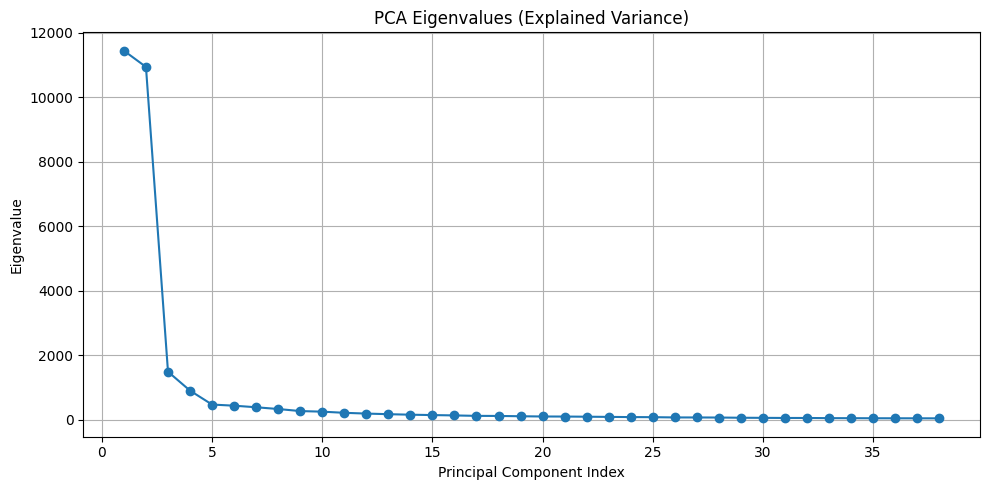

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn import decomposition
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

pca = decomposition.PCA(n_components=100, whiten=True)
clf = Pipeline([('pca', pca),
                ('logistic_regression', LogisticRegression(max_iter=1000, fit_intercept=True))])


clf.fit(X_train_std, y_train)

plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, len(pca.explained_variance_)+1), pca.explained_variance_, marker='o')
plt.title("PCA Eigenvalues (Explained Variance)")
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue")
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 1000x800 with 0 Axes>

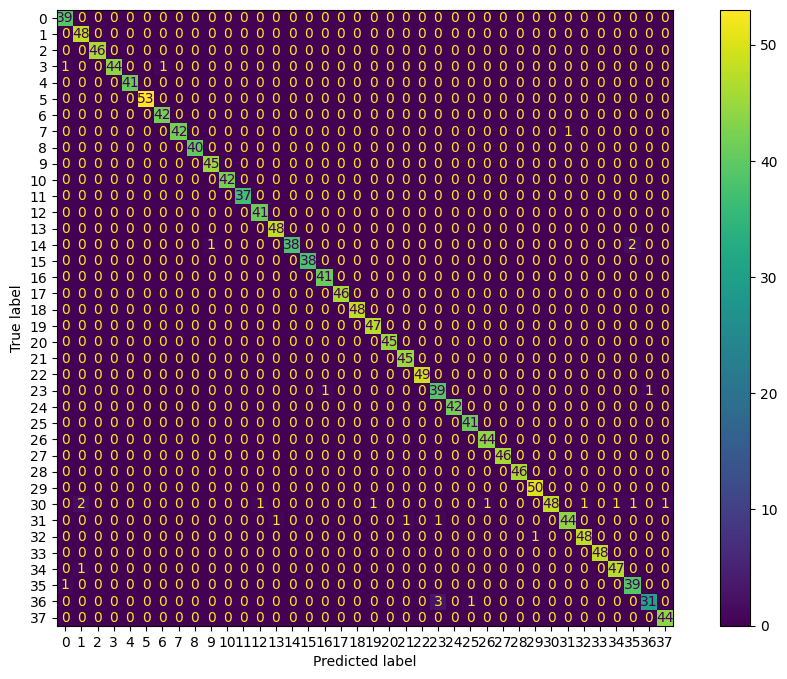

In [34]:
y_train_pred = clf.predict(X_train_std)
y_test_pred = clf.predict(X_test_std)

cm = metrics.confusion_matrix(y_train_pred, y_train)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
plt.figure(figsize=(10, 8))
disp.plot()
plt.gcf().set_size_inches(12, 8)
plt.show()

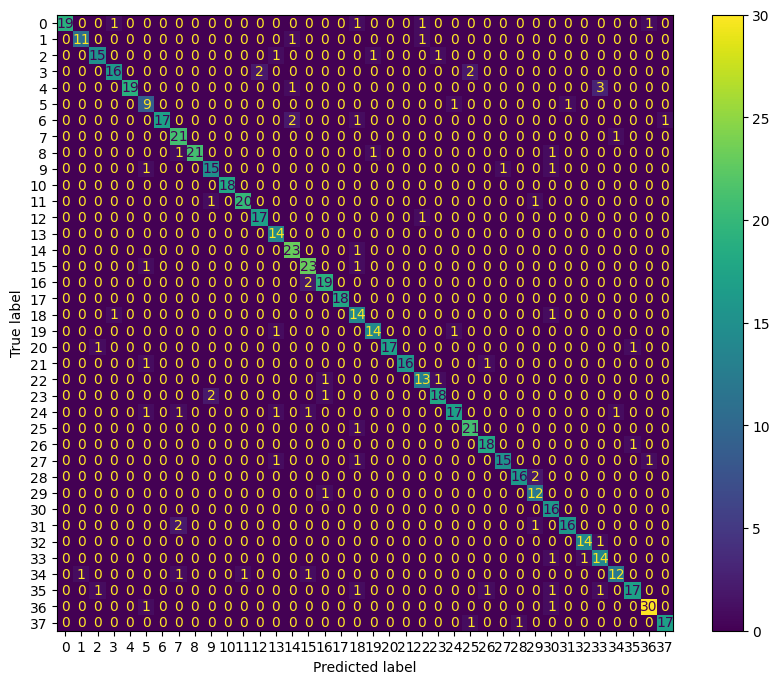

In [35]:
cm = metrics.confusion_matrix(y_test, y_test_pred)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.gcf().set_size_inches(10, 8)
plt.show()

In [37]:
from sklearn.metrics import accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test f1 score:", metrics.f1_score(y_test, y_test_pred, average='weighted'))
print(metrics.classification_report(y_test, y_test_pred))

Test Accuracy: 0.8855172413793103
Test f1 score: 0.886775459790578
              precision    recall  f1-score   support

           1       1.00      0.83      0.90        23
           2       0.92      0.85      0.88        13
           3       0.88      0.83      0.86        18
           4       0.89      0.80      0.84        20
           5       1.00      0.83      0.90        23
           6       0.64      0.82      0.72        11
           7       1.00      0.81      0.89        21
           8       0.81      0.95      0.88        22
           9       1.00      0.88      0.93        24
          10       0.83      0.83      0.83        18
          11       1.00      1.00      1.00        18
          12       0.95      0.91      0.93        22
          13       0.89      0.94      0.92        18
          14       0.78      1.00      0.88        14
          15       0.85      0.96      0.90        24
          16       0.85      0.92      0.88        25
          17  